# Testando em duas dimensões

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()
# nao_finalizado > sites finalizados ou não
# horas_esperadas > horas para fazer o site
# preco > preço do site

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
dados.shape

(2157, 4)

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

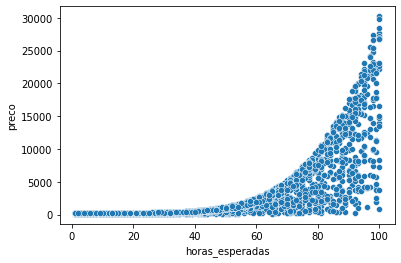

In [6]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

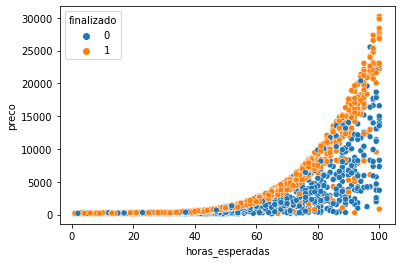

In [7]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)


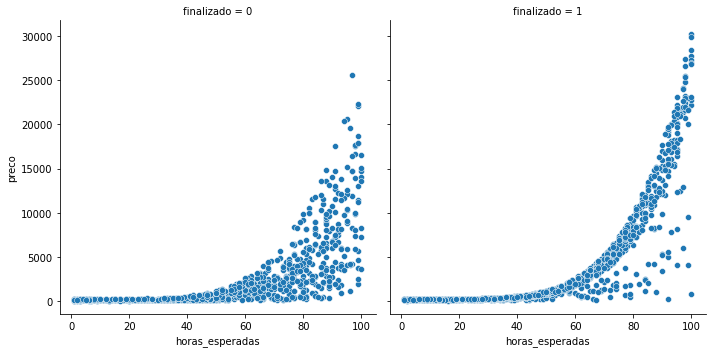

In [8]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

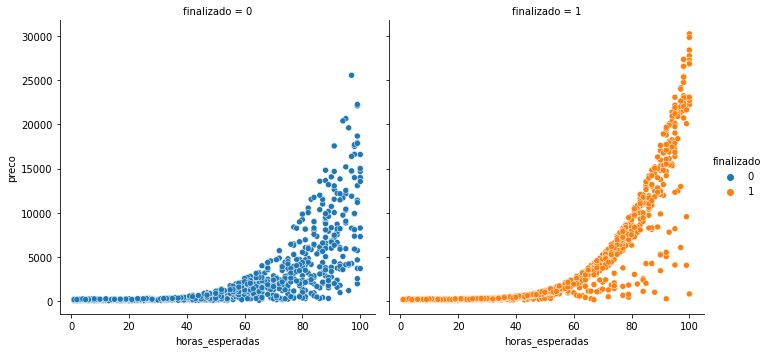

In [9]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [10]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# SEED = 20
SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.59%


/home/marceloicampos/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
import numpy as np
previsoes_do_marcelo = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_marcelo) * 100
print("A acurácia do Marcelo foi %.2f%%" % acuracia)

A acurácia do Marcelo foi 52.59%


Ou seja, com esse algoritmo simples, tivemos um resultado de 52.59% - um valor muito próximo ao do algoritmo anterior, com uma diferença de apenas 1,67%. Isto é, ele é pouco melhor do que sempre prever 1.

O que chamamos de previsoes_do_marcelo, na verdade é a linha de base, ou baseline, e é o parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline, e por isso é muito importante que ele exista ainda que teste sempre a mesma classe. Nas próximas aulas iremos analisar detalhadamente o que erramos para termos um acurácia tão baixa.

# Curva de decisão

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

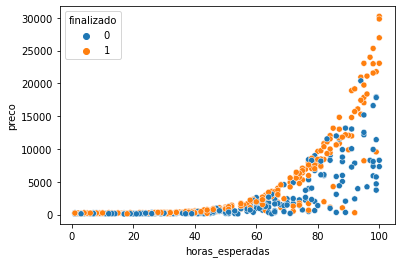

In [13]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [14]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [15]:
pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [16]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
eixo_y

array([  100.  ,   401.23,   702.46,  1003.69,  1304.92,  1606.15,
        1907.38,  2208.61,  2509.84,  2811.07,  3112.3 ,  3413.53,
        3714.76,  4015.99,  4317.22,  4618.45,  4919.68,  5220.91,
        5522.14,  5823.37,  6124.6 ,  6425.83,  6727.06,  7028.29,
        7329.52,  7630.75,  7931.98,  8233.21,  8534.44,  8835.67,
        9136.9 ,  9438.13,  9739.36, 10040.59, 10341.82, 10643.05,
       10944.28, 11245.51, 11546.74, 11847.97, 12149.2 , 12450.43,
       12751.66, 13052.89, 13354.12, 13655.35, 13956.58, 14257.81,
       14559.04, 14860.27, 15161.5 , 15462.73, 15763.96, 16065.19,
       16366.42, 16667.65, 16968.88, 17270.11, 17571.34, 17872.57,
       18173.8 , 18475.03, 18776.26, 19077.49, 19378.72, 19679.95,
       19981.18, 20282.41, 20583.64, 20884.87, 21186.1 , 21487.33,
       21788.56, 22089.79, 22391.02, 22692.25, 22993.48, 23294.71,
       23595.94, 23897.17, 24198.4 , 24499.63, 24800.86, 25102.09,
       25403.32, 25704.55, 26005.78, 26307.01, 26608.24, 26909

In [17]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [18]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
yy

array([[  100.  ,   100.  ,   100.  , ...,   100.  ,   100.  ,   100.  ],
       [  401.23,   401.23,   401.23, ...,   401.23,   401.23,   401.23],
       [  702.46,   702.46,   702.46, ...,   702.46,   702.46,   702.46],
       ...,
       [29319.31, 29319.31, 29319.31, ..., 29319.31, 29319.31, 29319.31],
       [29620.54, 29620.54, 29620.54, ..., 29620.54, 29620.54, 29620.54],
       [29921.77, 29921.77, 29921.77, ..., 29921.77, 29921.77, 29921.77]])

In [19]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()[:100]

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [20]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [21]:
Z = modelo.predict(pontos)

/home/marceloicampos/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [22]:
Z = modelo.predict(pontos)
Z.shape

/home/marceloicampos/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [23]:
xx.shape

(100, 100)

In [24]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/home/marceloicampos/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

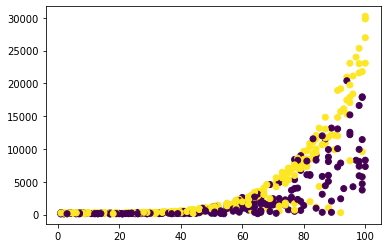

In [25]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

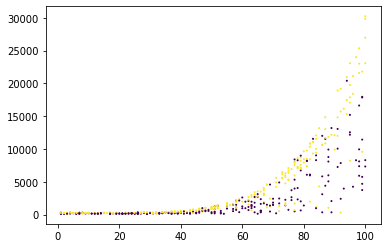

In [26]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [27]:
# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

#### Nós poderíamos obter um novo resultado executando novamente o código com alterações no SED (a variância de ordenação), mas ainda assim teríamos um resultado nada satisfatório. No caso abaixo, por exemplo (SEED = 5), a curva de decisão (decision boundary) mostra que todos os projetos receberam a classificação 0.

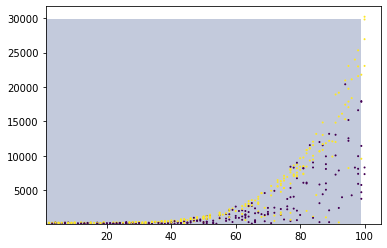

In [28]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Atualização do modelo SVC

In [29]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')

Treinaremos com 1617 elementos e testaremos com 540 elementos
